In [1]:
using CairoMakie;
using DelimitedFiles, Statistics, Glob, LaTeXStrings, StatsBase, LinearAlgebra, SparseArrays, Distances, LazySets,  MultivariateStats;
using Measures: mm
include("final_analysis_library.jl");

ones/rand1/rand2/rand3/rand4/rand5/

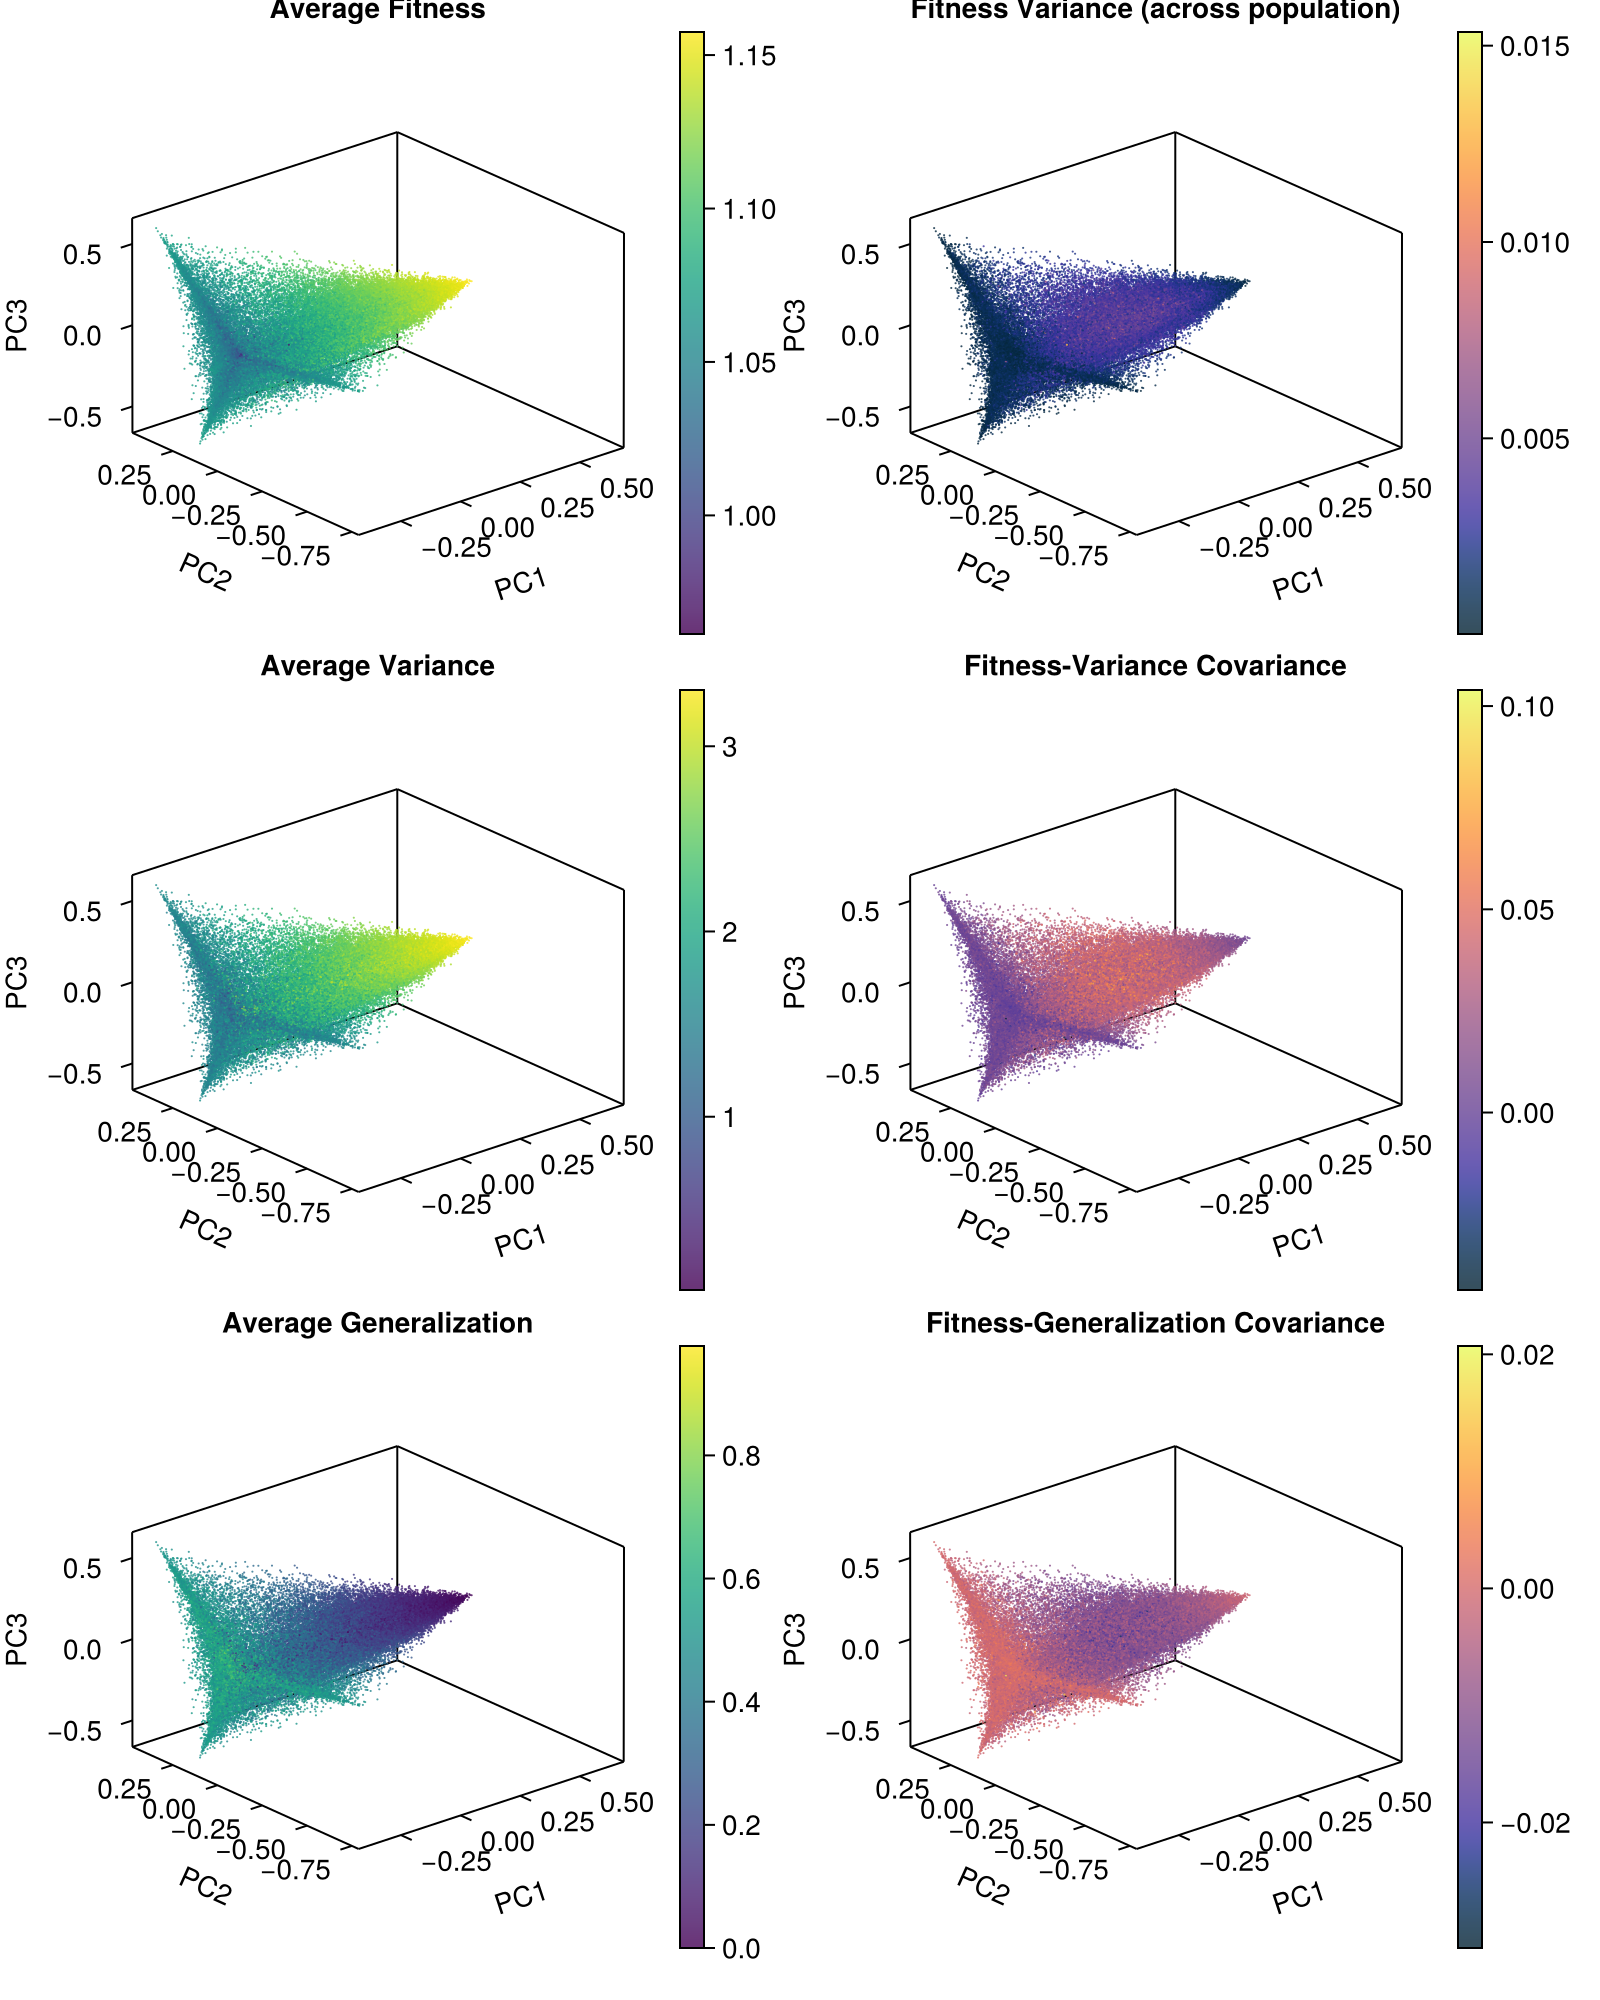

In [4]:
#simulation params
L = 8
M = 100
B = 1;
nu = 0.005;
Delta = 4.;
F0 = 1.; 

K = 4
pk = 0.2

ncopies = 100
tini = 75
nsteps = 200
dt = 50

N = 128

folder = "../data/persistent/Delta$(Delta)_F0$(F0)_nu$(nu)_N$(N)_M$(M)_B1_L$(L)_pers0.0/half_fixed/long_K$(K)_pk$(pk)/";
sfolder = folder*"zeros/sample_1/"
fieldmatrix = readdlm(sfolder*"fieldmatrix.txt",header=true)[1][:,2:end];
        
means = mean(fieldmatrix,dims=1)
vars = var(fieldmatrix,dims=1);

F,V,G = get_FVG(means,vars,L,K)

reF = Float64.(reshape(F,(1,2^L)))
reV = Float64.(reshape(V,(1,2^L)))
reG = Float64.(reshape(G,(1,2^L)));

init="zeros/"

Xtr = get_muller_tot(folder*init,"saved_snaps/",ncopies,L,nsteps,tini,dt)./N

Ftr = (reF*Xtr)[1,:]
Vtr = (reV*Xtr)[1,:]
Gtr = (reG*Xtr)[1,:]

cFtr = ((reF.^2)*Xtr)[1,:] .- Ftr.^2
cFVtr = ((reV.*reF)*Xtr)[1,:] .- (Ftr.*Vtr)
cFGtr = ((reG.*reF)*Xtr)[1,:] .- (Ftr.*Gtr)

P = fit(PCA, Xtr; maxoutdim=3)

Y = predict(P,Xtr);
Y1,Y2,Y3 = Y[1,:], Y[2,:], Y[3,:]

for init in append!(["ones/"],["rand$(i)/" for i in 1:5])
    print(init)
    Xtr = get_muller_tot(folder*init,"saved_snaps/",ncopies,L,nsteps,tini,dt)./N
    ftr  = (reF*Xtr)[1,:]
    vtr  = (reV*Xtr)[1,:]
    gtr  = (reG*Xtr)[1,:]
    cftr = ((reF.^2)*Xtr)[1,:] .- ftr.^2
    cfvtr = ((reV.*reF)*Xtr)[1,:] .- (ftr.*vtr)
    cfgtr = ((reG.*reF)*Xtr)[1,:] .- (ftr.*gtr)
    append!(Ftr,ftr)
    append!(Vtr,vtr)
    append!(Gtr,gtr)
    append!(cFtr,cftr)
    append!(cFVtr,cfvtr)
    append!(cFGtr,cfgtr)

    Y = predict(P,Xtr)
    append!(Y1,Y[1,:])
    append!(Y2,Y[2,:])
    append!(Y3,Y[3,:])
end

f = Figure(size = (800, 1000))
g1 = f[1,1] = GridLayout();
g2 = f[2,1] = GridLayout();
g3 = f[3,1] = GridLayout();
g4 = f[1,2] = GridLayout();
g5 = f[2,2] = GridLayout();
g6 = f[3,2] = GridLayout();

ax1 = Axis3(g1[1, 1], ygridvisible=false, xgridvisible=false, zgridvisible=false, protrusions=(50,10,10,0)) 
ax2 = Axis3(g2[1, 1], ygridvisible=false, xgridvisible=false, zgridvisible=false, protrusions=(50,10,10,0))
ax3 = Axis3(g3[1, 1], ygridvisible=false, xgridvisible=false, zgridvisible=false, protrusions=(50,10,10,0))
ax4 = Axis3(g4[1, 1], ygridvisible=false, xgridvisible=false, zgridvisible=false, protrusions=(50,10,10,0))
ax5 = Axis3(g5[1, 1], ygridvisible=false, xgridvisible=false, zgridvisible=false, protrusions=(50,10,10,0))
ax6 = Axis3(g6[1, 1], ygridvisible=false, xgridvisible=false, zgridvisible=false, protrusions=(50,10,10,0))

axbar1 = Axis(g1[1, 2], ygridvisible=false, xgridvisible=false)
axbar2 = Axis(g2[1, 2], ygridvisible=false, xgridvisible=false)
axbar3 = Axis(g3[1, 2], ygridvisible=false, xgridvisible=false)
axbar4 = Axis(g4[1, 2], ygridvisible=false, xgridvisible=false)
axbar5 = Axis(g5[1, 2], ygridvisible=false, xgridvisible=false)
axbar6 = Axis(g6[1, 2], ygridvisible=false, xgridvisible=false)

hidedecorations!(axbar1)
hidedecorations!(axbar2)
hidedecorations!(axbar3)
hidedecorations!(axbar4)
hidedecorations!(axbar5)
hidedecorations!(axbar6)

s1 = scatter!(ax1, Y1,Y2, Y3, markersize=1.5, color = Ftr,colormap = :viridis,alpha=0.8)
s2 = scatter!(ax2, Y1,Y2, Y3, markersize=1.5, color = Vtr, colormap = :viridis,alpha=0.8)
s3 = scatter!(ax3, Y1,Y2, Y3, markersize=1.5, color = Gtr, colormap = :viridis,alpha=0.8)
s4 = scatter!(ax4, Y1,Y2, Y3, markersize=1.5, color = cFtr,colormap = :thermal,alpha=0.8)
s5 = scatter!(ax5, Y1,Y2, Y3, markersize=1.5, color = cFVtr, colormap = :thermal,alpha=0.8)
s6 = scatter!(ax6, Y1,Y2, Y3, markersize=1.5, color = cFGtr, colormap = :thermal,alpha=0.8) 

cb1 = Colorbar(g1[1,2],s1)
cb2 = Colorbar(g2[1,2],s2)
cb3 = Colorbar(g3[1,2],s3)
cb4 = Colorbar(g4[1,2],s4)
cb5 = Colorbar(g5[1,2],s5)
cb6 = Colorbar(g6[1,2],s6)

ax1.title = "Average Fitness"
ax2.title = "Average Variance"
ax3.title = "Average Generalization"
ax4.title = "Fitness Variance (across population)"
ax5.title = "Fitness-Variance Covariance"
ax6.title = "Fitness-Generalization Covariance"

ax1.xlabel = "PC1"
ax1.ylabel = "PC2"
ax1.zlabel = "PC3"
ax2.xlabel = "PC1"
ax2.ylabel = "PC2"
ax2.zlabel = "PC3"
ax3.xlabel = "PC1"
ax3.ylabel = "PC2"
ax3.zlabel = "PC3"
ax4.xlabel = "PC1"
ax4.ylabel = "PC2"
ax4.zlabel = "PC3"
ax5.xlabel = "PC1"
ax5.ylabel = "PC2"
ax5.zlabel = "PC3"
ax6.xlabel = "PC1"
ax6.ylabel = "PC2"
ax6.zlabel = "PC3"

save("../data/plots/SI_PC_assoc.pdf", f)

f